# TD 2 | Analyse et visualisation de données avec numpy, pandas et matplotlib


Objectifs du TD :

* découvrir la visualisation de données avec matplotlib
* approfondir la maîtrise de numpy et pandas
* effectuer une première analyse exploratoire de données (EDA)
* découvrir la librairie de machine learning (ML) scikit-learn
* appliquer des techniques basiques d'apprentissage non supervisé pour visualiser et classifier des données (PCA, $k$-means)

---

## 1. Exploratory Data Analysis (EDA) avec matplotlib

<img src="./rc/matplotlib.png" />

La librairie la plus couramment utilisée pour visualiser des données en Python est matplotlib (https://matplotlib.org/). D'autres librairies très utilisées et permettant certaines fonctionnalités plus avancées sont plotly (https://plot.ly/python/), bokeh (https://bokeh.pydata.org/en/latest/) ou encore seaborn (https://seaborn.pydata.org/). Nous allons dans un premier temps découvrir la première, matplotlib.

Le contexte permettant de tracer des graphes est `matplotlib.pyplot`, que l'on abrège souvent par `plt`, comme ci-dessous :

In [2]:
import matplotlib.pyplot as plt

**La documentation de pyplot : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html#module-matplotlib.pyplot**

Découvrons les différents types de graphes en pratique, à l'aide du fichier `Vol010.csv`.

### Chargement des données de vol

In [3]:
!git clone https://github.com/MadaneA/MACS3_Stats_TDs.git

fatal : le chemin de destination 'MACS3_Stats_TDs' existe déjà et n'est pas un répertoire vide.


In [4]:
import os
os.getcwd()

'/Users/yacinebenami/Desktop/MACS3/Analyse_de_donnees'

In [5]:
import os
os.chdir('MACS3_Stats_TDs')

In [6]:
import pandas as pd
import numpy as np

In [7]:
# Ne pas modifier
vol = pd.read_csv("./data/Vol010.csv").drop(0).dropna(how='any').iloc[::10] # On ne garde qu'un point sur 10 pour limiter les points à affichervol
vol.index = np.arange(vol.shape[0])
vol['t'] = pd.to_datetime(vol['t'])
vol[vol.columns[1:]] = vol[vol.columns[1:]].apply(pd.to_numeric)
vol['FLIGHT_MOD'] = vol['FLIGHT_MOD'].apply(int)

/var/folders/sz/74ncbmz13mg67zx7q7r3_4f00000gn/T/ipykernel_21592/4137122529.py:4: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S.%f format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  vol['t'] = pd.to_datetime(vol['t'])


In [8]:
vol.dtypes

t             datetime64[ns]
EGT_SEL              float64
FLIGHT_MOD             int64
FMV_SEL              float64
HPTC_SEL             float64
LPTC_SEL             float64
N1_SEL               float64
N2_ACTSEL            float64
OIL_P                float64
OIL_TEMP             float64
PS3_SEL              float64
PT2_SEL              float64
P0_SEL               float64
TAT                  float64
TBV_SEL              float64
TRA_SEL              float64
T25_SEL              float64
T3_SEL               float64
VBV_SEL              float64
VIB_CN1              float64
VIB_CN2              float64
VIB_TN1              float64
VIB_TN2              float64
VSV_SEL              float64
WFM_SEL              float64
XM                   float64
dtype: object

In [9]:
print(vol.shape)
vol.head()

(2283, 26)


,t,EGT_SEL,FLIGHT_MOD,FMV_SEL,HPTC_SEL,LPTC_SEL,N1_SEL,N2_ACTSEL,OIL_P,OIL_TEMP,...,T25_SEL,T3_SEL,VBV_SEL,VIB_CN1,VIB_CN2,VIB_TN1,VIB_TN2,VSV_SEL,WFM_SEL,XM
0,2011-09-15 14:26:02.875,335.984000,1,0.0,0.0,0.0,0.0,0.0,0.000,177.3740,...,-128.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7679.84,0.15
1,2011-09-15 14:26:05.375,72.000600,1,0.0,0.0,0.0,0.0,0.0,0.000,68.0000,...,-128.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.15
2,2011-09-15 14:26:07.875,72.001100,1,0.0,0.0,0.0,0.0,0.0,0.000,68.0000,...,-128.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.15
3,2011-09-15 14:26:10.375,527.978000,1,0.0,0.0,0.0,0.0,0.0,0.000,68.0000,...,-128.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10752.10,0.15
4,2011-09-15 14:26:12.875,-0.001335,1,0.0,0.0,0.0,0.0,0.0,456.002,44.6249,...,-128.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.15


### Line/Scatter plot : Visualisation d'un vol avec `plt.plot`

La méthode `plt.plot(x=..., y=..., options)` permet de visualiser des points sur un graphique. La commande ci-dessous affiche la valeur d'une variable au cours du temps. 

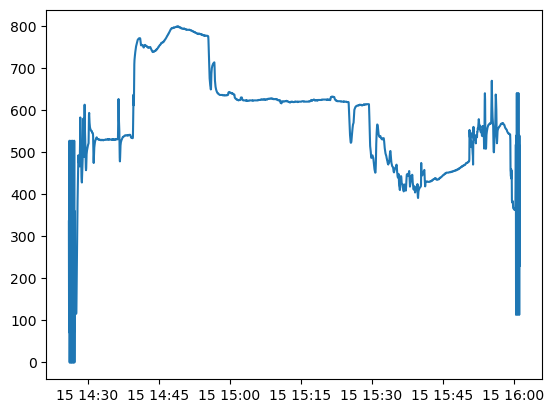

In [10]:
plt.plot(vol['t'], vol['EGT_SEL'])

Il est possible de superposer deux graphes en appelant plusieurs points plt.plot(). De plus, plot() peut recevoir une grande quantité d'options pour personnaliser l'aspect de la courbe :

- ligne ou points
- type de marqueur
- couleurs, taille/épaisseur de trait
- ...

Certaines options peuvent être combinées et exprimées sous forme de chaîne de caractère. Par exemple, 'b^--' signifie "marqueurs bleus en forme de triangles, reliés par un trait pointillé".

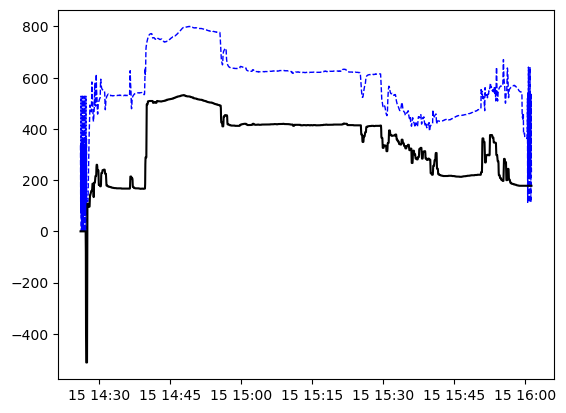

In [11]:
plt.plot(vol['t'], vol['EGT_SEL'], 'b--', linewidth=1)
plt.plot(vol['t'], vol['T3_SEL'], 'k-')

Il est possible de visualiser plusieurs graphiques de manière juxtaposée. La méthode utilisée est plt.subplot().
Ses paramètres sont : le nombre de lignes, le nombre de colonnes, et le sous-plot sur lequel vous vous trouvez. 

Ainsi, dans plt.subplot(1, 2, 1); 1, 2, 1 signifie "une figure à 1 ligne et 2 colonnes : allez au premier sous-plot". Ensuite, 1, 2, 2 signifie "une figure à 1 ligne et 2 colonnes : passez au deuxième sous-plot"

plt.figure(figsize=(x,y)) permet de définir la taille des plots, avec x : longueur et y: largeur.

plt.xlim(inf,sup) et plt.ylim(inf,sup) permettent de fixer la borne inférieur et supérieur respectivement de l'axe x et l'axe y.

(-600.0, 850.0)

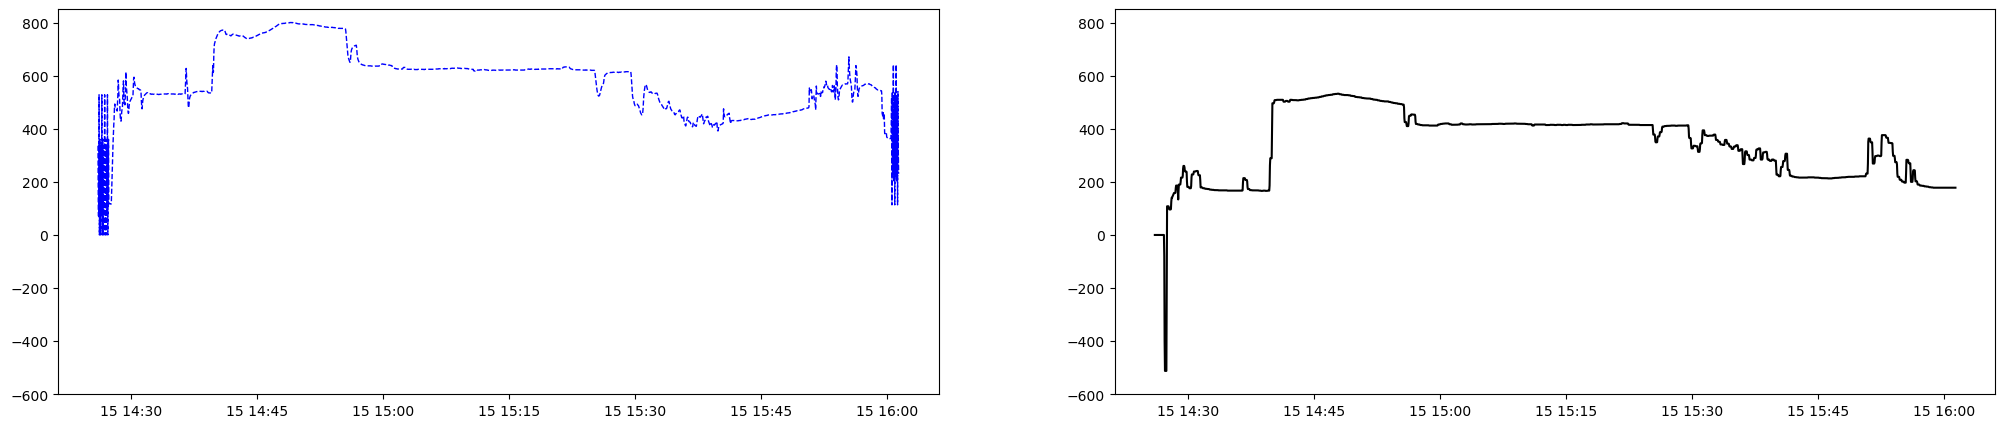

In [12]:
fig = plt.figure(figsize=(25,5))

plt.subplot(1, 2, 1)
plt.plot(vol['t'], vol['EGT_SEL'], 'b--', linewidth=1)
plt.ylim(-600,850)

plt.subplot(1, 2, 2)
plt.plot(vol['t'], vol['T3_SEL'], 'k-')
plt.ylim(-600,850)
         

Text(0.5, 1.0, 'Température T3_SEL en fonction du Temps')

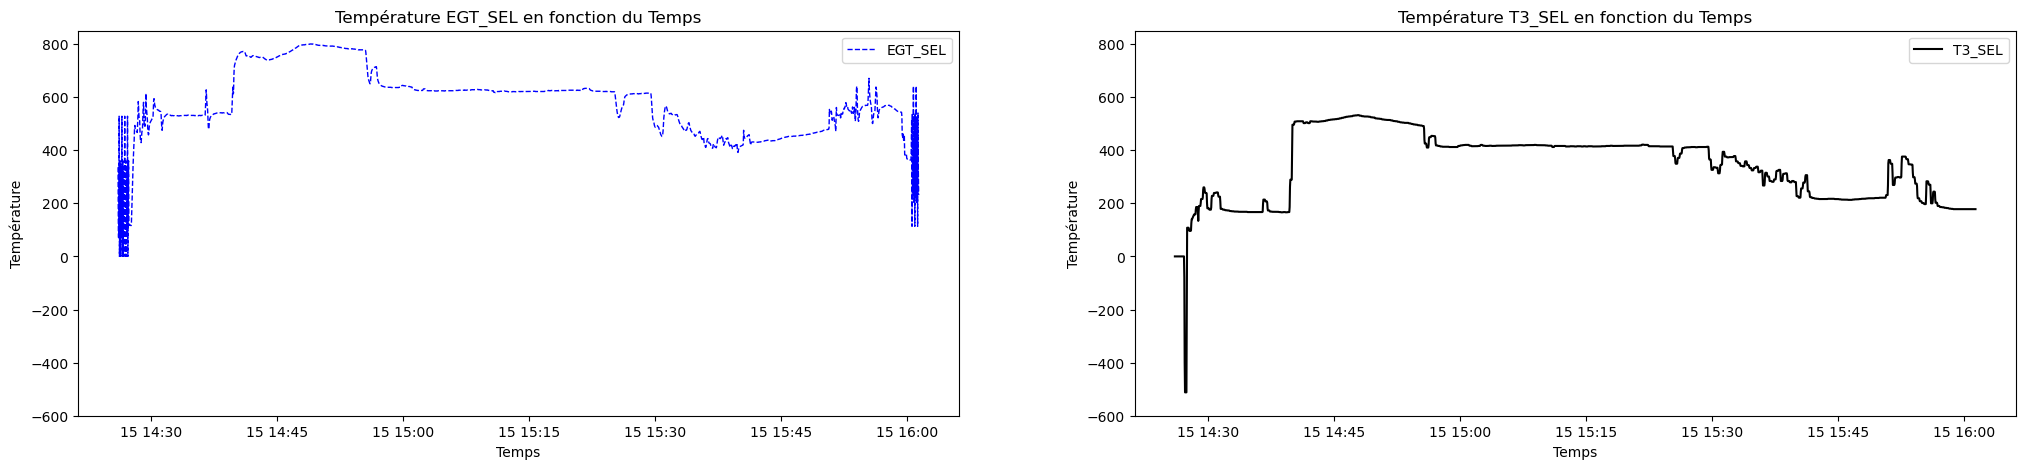

In [13]:
"""
EXERCICE - Plot avec titres et légende

Explorez la documentation de pyplot pour ajouter au graphe précédent :
1. Un titre à la figure
2. Des titres aux axes
3. Une légende
"""
fig = plt.figure(figsize=(25,5))

plt.subplot(1, 2, 1)
plt.plot(vol['t'], vol['EGT_SEL'], 'b--', linewidth=1, label='EGT_SEL')
plt.ylim(-600,850)
plt.xlabel('Temps')
plt.ylabel('Température')
plt.legend()
plt.title('Température EGT_SEL en fonction du Temps')

plt.subplot(1, 2, 2)
plt.plot(vol['t'], vol['T3_SEL'], 'k-', label='T3_SEL')
plt.ylim(-600,850)
plt.xlabel('Temps')
plt.ylabel('Température')
plt.legend()
plt.title('Température T3_SEL en fonction du Temps')



### Corrélation

Utiliser la méthode corrcoef du module numpy pour calculer la corrélation entre deux variables X et Y.

In [14]:
my_rho = np.corrcoef(vol['T3_SEL'], vol['N1_SEL'])

print(my_rho)

[[1.         0.93912182]
 [0.93912182 1.        ]]


Nuage de point entre les deux variables T3 et N1 :

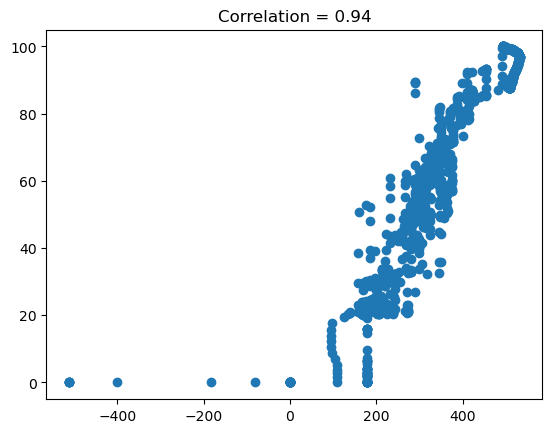

In [15]:
plt.scatter(vol['T3_SEL'],vol['N1_SEL'])
plt.title('Correlation = ' + "{:.2f}".format(my_rho[0,1]))
plt.show()

<Axes: >

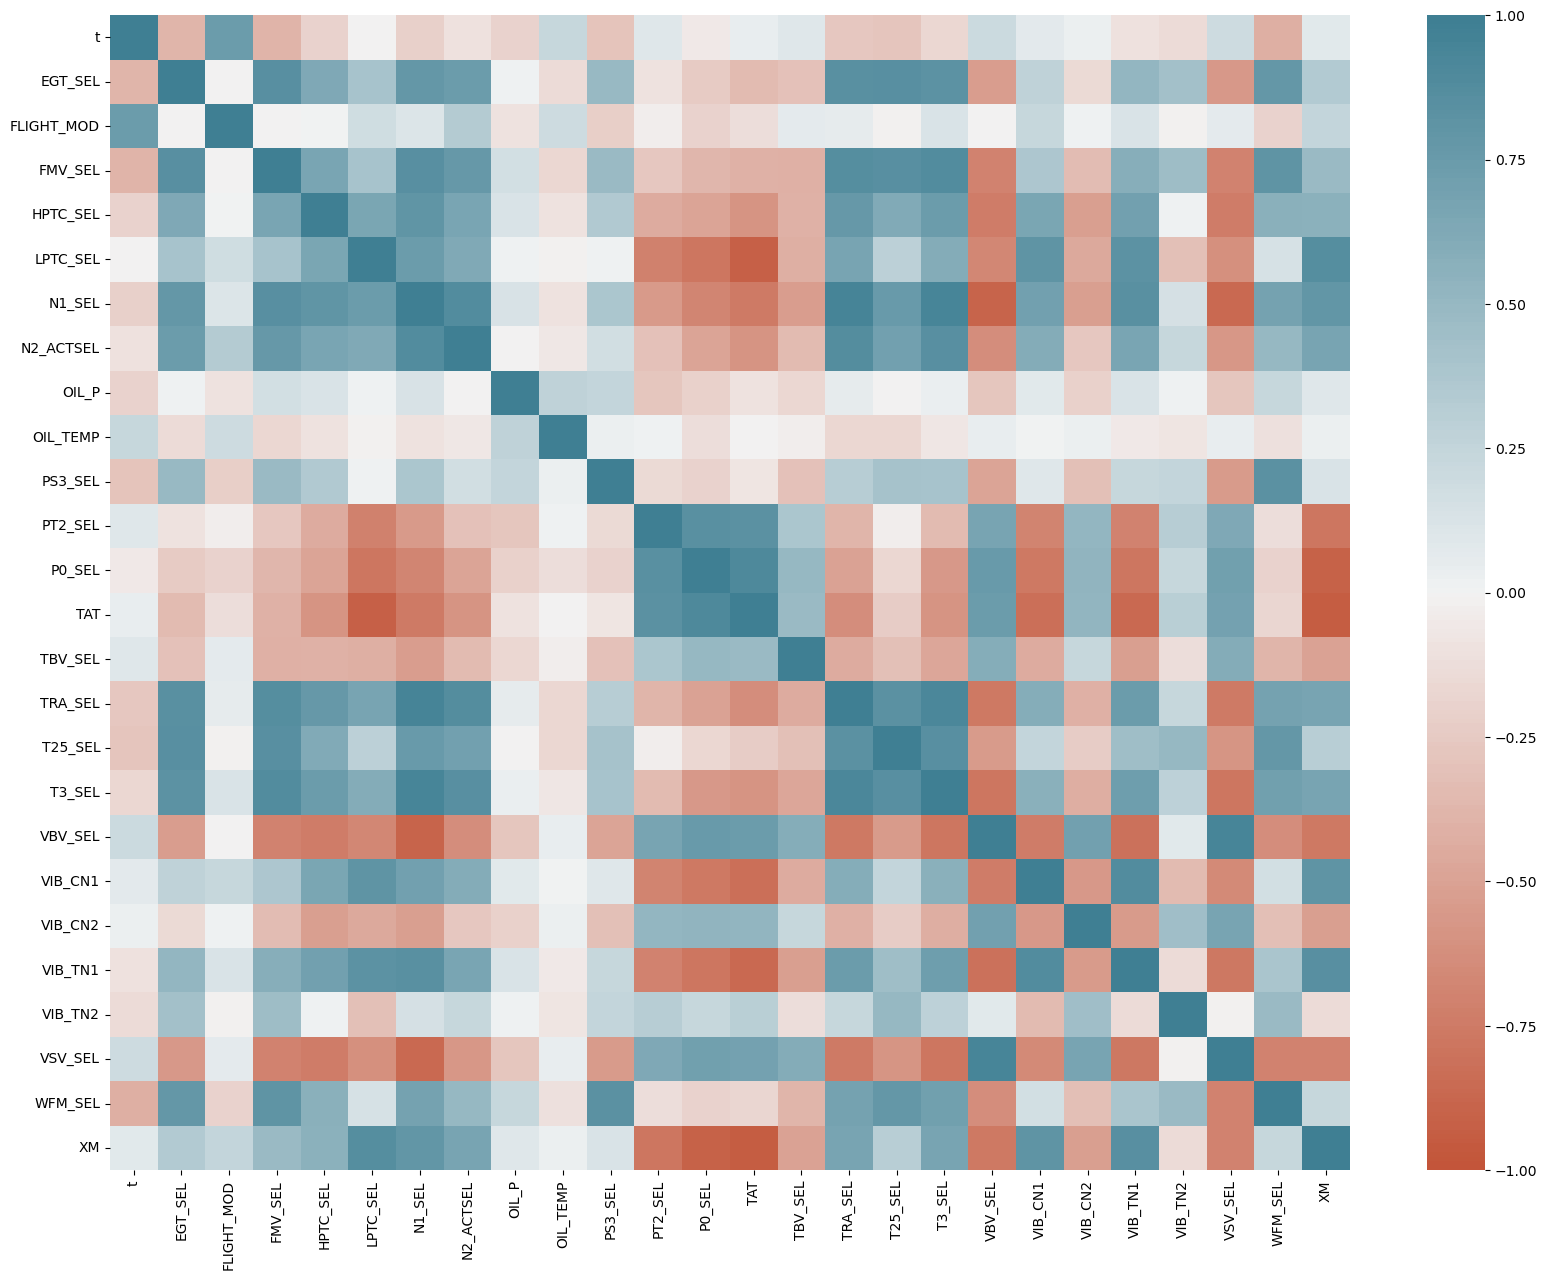

In [16]:
import seaborn as sns

# calculate the correlation matrix
corr = vol.corr()

# plot the heatmap
fig = plt.figure(figsize=(20,15))

sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, annot=False, fmt='.2f', vmin=-1, vmax=1, center=0, 
        cmap=sns.diverging_palette(20, 220, n=200))

# Essayer avec annot=True

### Bar plot : temps passé dans chaque phase de vol avec `plt.bar`

Pour afficher un ensemble réduit de valeurs, le diagramme le plus adapté est le bar plot. Tout d'abord, il nous faut calculer le nombre de lignes du vol par phase de vol. La phase de vol est symbolisée par la variable `FLIGHT_MOD`. On suppose la correspondance suivante :

`FLIGHT_MOD` | Phase de vol
-------------|-------------
1 | taxi
2 | take_off
3 | begin_climb
4 | climb
5 | cruise_climb
6 | cruise
7 | descent
8 | approach
9 | flare
10 | landing

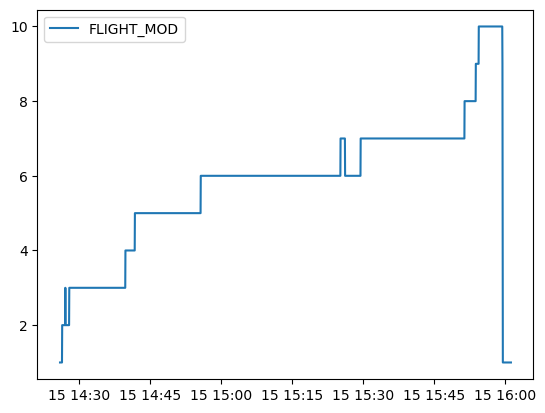

In [17]:
plt.plot(vol['t'], vol['FLIGHT_MOD'], label='FLIGHT_MOD')
plt.legend()

In [18]:
"""
EXERCICE - Correpondance FLIGHT_MOD/phase de vol
1. Créez une liste définissant la correspondance FLIGHT_MOD/phase de vol
2. Ajoutez une nouvelle colonne 'FLIGHT_PHASE' au DataFrame contenant le nom de la phase. Une possibilité est d'utiliser la méthode "apply" et une fonction anonyme (lambda).
"""


'\nEXERCICE - Correpondance FLIGHT_MOD/phase de vol\n1. Créez une liste définissant la correspondance FLIGHT_MOD/phase de vol\n2. Ajoutez une nouvelle colonne \'FLIGHT_PHASE\' au DataFrame contenant le nom de la phase. Une possibilité est d\'utiliser la méthode "apply" et une fonction anonyme (lambda).\n'

Question 1

In [19]:
liste_FMOD_FVol = [
    (1, 'Taxi'),
    (2, 'Take_off'),
    (3, 'Begin_climb'),
    (4, 'Climb'),
    (5, 'Cruise_climb'),
    (6, 'Cruise'),
    (7, 'Descent'),
    (8, 'Approach'),
    (9, 'Flare'),
    (10, 'Landing')
]
print(liste_FMOD_FVol)

[(1, 'Taxi'), (2, 'Take_off'), (3, 'Begin_climb'), (4, 'Climb'), (5, 'Cruise_climb'), (6, 'Cruise'), (7, 'Descent'), (8, 'Approach'), (9, 'Flare'), (10, 'Landing')]


Question 2

In [20]:
flight_phases_dict = dict(liste_FMOD_FVol)
vol['FLIGHT_PHASE'] = vol['FLIGHT_MOD'].apply(lambda x: flight_phases_dict.get(x, 'Unknown'))


print(vol[['FLIGHT_MOD', 'FLIGHT_PHASE']])

#print(vol['FLIGHT_MOD'].unique()) #Utiliser pour vérifier que tous les Flight Mod sont concernés
#print(vol['FLIGHT_MOD'].value_counts()) #Utiliser pour recenser le nombre de fois où chaque Flight Mod est présent



      FLIGHT_MOD FLIGHT_PHASE
0              1         Taxi
1              1         Taxi
2              1         Taxi
3              1         Taxi
4              1         Taxi
...          ...          ...
2278           1         Taxi
2279           1         Taxi
2280           1         Taxi
2281           1         Taxi
2282           1         Taxi

[2283 rows x 2 columns]


In [21]:
"""
EXERCICE - Calcul du nombre de lignes par phase de vol
Groupez le DataFrame par phase de vol avec groupby() et aggrégez le résultat avec size().
"""
nb_lignes_phases_vol = vol.groupby('FLIGHT_PHASE').size()
print(nb_lignes_phases_vol)

FLIGHT_PHASE
Approach         57
Begin_climb     281
Climb            48
Cruise          788
Cruise_climb    335
Descent         550
Flare            16
Landing         120
Take_off         35
Taxi             53
dtype: int64


Voici enfin notre fameux bar plot :

<BarContainer object of 10 artists>

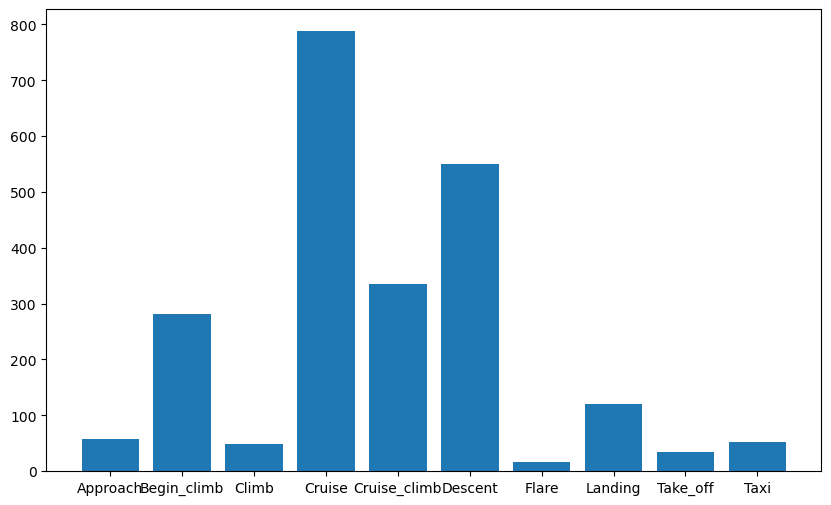

In [22]:
time_by_phase=nb_lignes_phases_vol
plt.figure(figsize=(10,6)) # la méthode figure permet de créer une nouvelle figure et de configurer ses paramètres
plt.bar(np.arange(time_by_phase.size), time_by_phase, tick_label=time_by_phase.index.tolist())

Text(0, 0.5, 'Température T25 maximale')

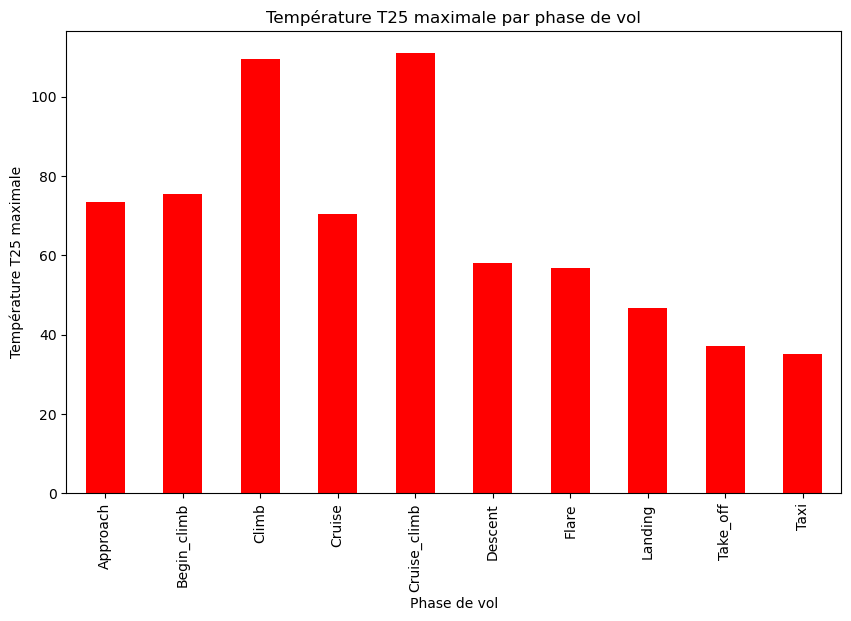

In [23]:
"""
EXERCICE - Affichez la température T25 maximale par phase de vol sur un bar plot de couleur rouge.
"""
T_max = vol.groupby('FLIGHT_PHASE')['T25_SEL'].max()
plt.figure(figsize=(10, 6))
T_max.plot(kind='bar', color='red')
plt.title('Température T25 maximale par phase de vol')
plt.xlabel('Phase de vol')
plt.ylabel('Température T25 maximale')


### Pie plot : temps passé dans chaque phase de vol avec `plt.pie`

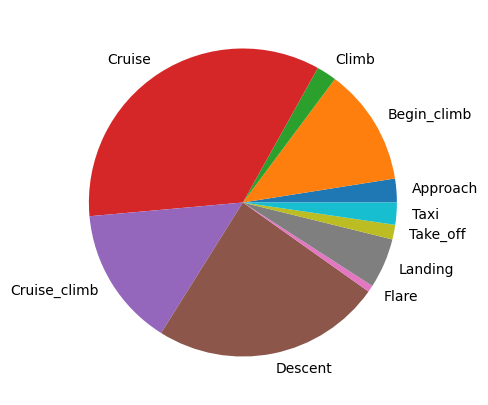

In [24]:
plt.figure(figsize=(5,5))
plt.pie(time_by_phase, labels=time_by_phase.index.tolist());

### Histogramme : représenter la distribution d'une variable

La meilleur façon de visualiser la distribution statistique d'une variable est l'histogramme. La méthode s'appelle `plt.hist()`. Étudiez sa documentation, car elle a de nombreux paramètres.

Voici un exemple avec la variable N1.

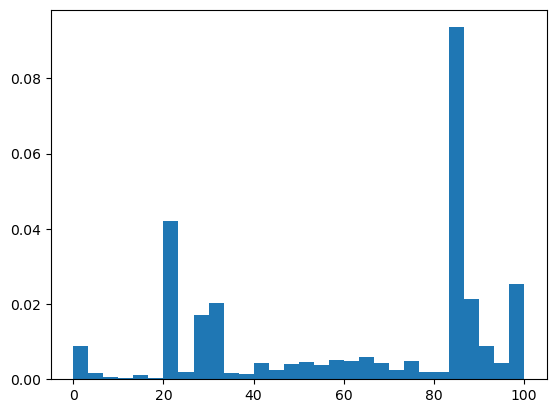

In [25]:
plt.hist(vol['N1_SEL'], bins=30, density=True); # Quel est l'effet de l'argument "density=..." ?

Beaucoup d'autres types de plots existents ! À vous de les découvrir...

## 2. Machine Learning non supervisé pour l'exploration de données avec scikit-learn

<img src="rc/scikit2.png" />

Dans cette section, on continue d'explorer le jeu de données à l'aide de techniques classique :

* PCA (Principal Component Analysis, https://fr.wikipedia.org/wiki/Analyse_en_composantes_principales) : permet de trouver les composantes principales d'un jeu de données, correspondant aux directions orthogonales de plus grande variabilité des données. Ce directions correspondent aux vecteurs propres de la matrice de corrélation. En pratique, cette technique statistique permet de réduire la dimensionalité des données en les projectant sur les directions principales. En réduisant la dimensionalité à 2, on peut donc visualiser les données sur un plan.

<img width="300px" src="rc/PCA_fish.png" />

* $k$-means (https://fr.wikipedia.org/wiki/K-moyennes) est l'algorithme le plus répandu de _clustering_. Le clustering consiste à partitionner les données en différents groupes (appelés _clusters_), en maximisant la similarité _intra-cluster_ (entre les points d'un même cluster) et minimisant la similarité _inter-cluster_ (entre les points de clusters différents). Le clustering est aussi appelée classification _non supervisée_ (car on ne dispose pas d'étiquettes pour chaque classe).

<img width="300px" src="rc/cluster.png" />

Ces deux algorithmes incontournables permettent de décrire nos données et répondre aux questions suivantes :

* Quel est la distribution des données dans le plan des 2 première CP (composantes principales) ?
* Y a-t-il des groupes distincts dans nos données ?


#### 2.1. Préparation des données

Ces algorithmes requièrent des données numériques. Il faut donc éliminer du jeu de données les variables non numérique ou les transformer en variables numériques.

De plus, on essayera dans la suite de classifier les instants du vol par phase de vol en utilisant un algorithme de clustering. On élimine donc également la colonne "FLIGHT_MOD" du jeu de données.

In [26]:
"""
EXERCICE - Préparation des données
1. Quelles sont les variables non numériques dans les données de vol ?
2. Supprimez ces colonnes, ainsi que le FLIGHT_MOD, et créez une variable X_vol contenant les valeurs numériques sous forme d'array numpy (on y accède via la propriété `values`).
3. Affichez les dimensions de X_vol (nombre d'individus et de variables).
"""
vol.dtypes

t               datetime64[ns]
EGT_SEL                float64
FLIGHT_MOD               int64
FMV_SEL                float64
HPTC_SEL               float64
LPTC_SEL               float64
N1_SEL                 float64
N2_ACTSEL              float64
OIL_P                  float64
OIL_TEMP               float64
PS3_SEL                float64
PT2_SEL                float64
P0_SEL                 float64
TAT                    float64
TBV_SEL                float64
TRA_SEL                float64
T25_SEL                float64
T3_SEL                 float64
VBV_SEL                float64
VIB_CN1                float64
VIB_CN2                float64
VIB_TN1                float64
VIB_TN2                float64
VSV_SEL                float64
WFM_SEL                float64
XM                     float64
FLIGHT_PHASE            object
dtype: object

Question 1 $\\$
Les variables non numériques dans les données de vol sont:$\\$
- t
- FLIGHT_PHASE

Question 2

In [27]:
vol_numeriques = vol.drop(columns=['t', 'FLIGHT_PHASE', 'FLIGHT_MOD'], errors='ignore')
X_vol = vol_numeriques.values


Question 3

In [28]:
print(X_vol.shape)

(2283, 24)


Ensuite, il est nécessaire en analyse de données de normaliser nos données, car les différentes variables peuvent avoir des unités et plages de valeurs très différentes les unes des autres. Par exemple, certaines variables varient entre 0 et 1, d'autre, comme les températures, peuvent varier (en gros) de 0 à 1000. Pour pouvoir les rendre comparables, on utilisera la normalisation standard suivante, appelée _standardisation_ :

1. Retrait de la moyenne de chaque variable.
2. Division par l'écart-type.

Cela permet d'obtenir des variables de moyenne nulle et d'écart-type 1. Il existe bien entendu des normalisations bien plus poussées.

In [29]:
"""
EXERCICE - Standardisation
1. Normalisez le jeu de donnée X_vol comme expliqué précédemment, et stockez le résultat dans une variable X_vol_norm.
   Pour cela, utilisez les méthodes mean() et std() de numpy, en prenant garde à calculer selon les bonnes dimensions.
2. Véfifiez à la fin que X_vol_norm a bien une moyenne nulle et un écart-type égal à 1 pour toutes les variables.
3. Que renvoie `(X_vol_norm.mean(axis=0) == 0).all()` ? Pourquoi à votre avis ? Pour pailler à ce problème, documentez-vous et utilisez la méthode `np.isclose` de numpy 
   pour effectuer cette vérification.
"""


'\nEXERCICE - Standardisation\n1. Normalisez le jeu de donnée X_vol comme expliqué précédemment, et stockez le résultat dans une variable X_vol_norm.\n   Pour cela, utilisez les méthodes mean() et std() de numpy, en prenant garde à calculer selon les bonnes dimensions.\n2. Véfifiez à la fin que X_vol_norm a bien une moyenne nulle et un écart-type égal à 1 pour toutes les variables.\n3. Que renvoie `(X_vol_norm.mean(axis=0) == 0).all()` ? Pourquoi à votre avis ? Pour pailler à ce problème, documentez-vous et utilisez la méthode `np.isclose` de numpy \n   pour effectuer cette vérification.\n'

Question 1

In [30]:
mean_X_vol = np.mean(X_vol, axis=0)  
std_X_vol = np.std(X_vol, axis=0) 
X_vol_norm = (X_vol - mean_X_vol) / std_X_vol
print(X_vol_norm)

[[-1.94636862 -1.54398554 -1.31833351 ... -0.84569979  2.76129306
  -1.47841263]
 [-4.04490886 -1.54398554 -1.31833351 ... -0.84569979 -1.2829936
  -1.47841263]
 [-4.04490488 -1.54398554 -1.31833351 ... -0.84569979 -1.2829936
  -1.47841263]
 ...
 [-0.32302182 -2.22745911 -1.31833351 ... -0.84569979  2.76129306
  -1.47841263]
 [-2.06095294 -2.22745911 -1.31833351 ... -0.84569979 -1.2829936
  -1.47841263]
 [-2.78233176 -2.22745911 -1.31833351 ... -0.84569979 -1.2829936
  -1.47841263]]


Question 2

In [31]:
mean_X_vol_norm = np.mean(X_vol_norm, axis=0)
std_X_vol_norm = np.std(X_vol_norm, axis=0)

print("Moyennes après normalisation :", mean_X_vol_norm)
print("Écart-types après normalisation :", std_X_vol_norm)

Moyennes après normalisation : [ 6.22464070e-16 -9.95942512e-17  1.86739221e-16  0.00000000e+00
  7.46956884e-17  2.61434909e-16  2.48985628e-17 -2.61434909e-16
 -7.46956884e-17  2.24087065e-16  1.74289940e-16 -4.97971256e-17
  6.22464070e-17 -9.95942512e-17 -2.48985628e-17  2.48985628e-17
  1.24492814e-17  4.97971256e-17  0.00000000e+00 -4.97971256e-17
  7.46956884e-17  2.48985628e-17  9.95942512e-17 -3.48579879e-16]
Écart-types après normalisation : [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Question 3

In [32]:
(X_vol_norm.mean(axis=0) == 0).all()

False

Elle renvoie False, cela indique que la moyenne pour chaque colonne n'est pas strictement egal à 0. Cela s'explique par le fait qu'on travaille avec des flottants qui entrainent souvent des approximations. Pour pallier à ce phénomène, nous pouvons utiliser ${np.isclose}$ en prenant une tolérance de la façon suivante:

In [33]:
mean_verif = np.isclose(X_vol_norm.mean(axis=0), 0, atol=1e-14)
print("Vérification des moyennes proches de 0 :\n", mean_verif)


Vérification des moyennes proches de 0 :
 [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True]


On ne ré-invente pas la roue : scikit-learn propose déjà un ensemble de méthodes de normalisation dans son module de prétraitement, `sklearn.preprocessing`.

In [34]:
from sklearn.preprocessing import StandardScaler
X_vol_norm2 = StandardScaler().fit_transform(X_vol)

In [35]:
"""
EXERCICE - La résultat est-il bien identique ?
"""
comparison = np.isclose(X_vol_norm, X_vol_norm2, atol=1e-14)
all_elements_close = comparison.all()
print("Les deux normalisations sont-elles identiques ? :", all_elements_close)

Les deux normalisations sont-elles identiques ? : True


#### 2.2. PCA

In [36]:
from sklearn.decomposition import PCA

In [37]:
vol_pca = PCA(n_components=2).fit(X_vol_norm2)

#### 2.2.1. Étude de la variance expliquée

Le modèle PCA permet d'obtenir la part de variance des données expliquée par les différentes CP. En général, on garde autant de CP que nécessaire pour expliquer au total par exemple 90% ou 95% de la variance des données, afin de limiter la perte d'information. Ici, on en conserve 2 pour des raisons de visualisation.

In [38]:
"""
EXERCICE - Étude de la variance expliquée
1. Affichez les parts de variance expliquées par les 2 premières CP à l'aide de la propriété `explained_variance_ratio_` du modèle PCA. Faites varier le nombres de CP (3, 4... 25).
   Affichez les résultats en %.
2. Quel est le pourcentage de variance expliquée par les 2 premières CP ? Est-il cohérent de ne conserver que ces 2 dimensions ?
   Combien de composantes faudrait-il garder pour expliquer 90% de la variance ? 95% ?
3. Tracez un bar plot de la variance expliquée par chaque CP, en n'oubliant pas le titre, les noms des axes et les étiquettes sur l'axe des abscisses ('PC1', 'PC2', etc.).
   Essayez avec une échelle logarithmique.
"""


"\nEXERCICE - Étude de la variance expliquée\n1. Affichez les parts de variance expliquées par les 2 premières CP à l'aide de la propriété `explained_variance_ratio_` du modèle PCA. Faites varier le nombres de CP (3, 4... 25).\n   Affichez les résultats en %.\n2. Quel est le pourcentage de variance expliquée par les 2 premières CP ? Est-il cohérent de ne conserver que ces 2 dimensions ?\n   Combien de composantes faudrait-il garder pour expliquer 90% de la variance ? 95% ?\n3. Tracez un bar plot de la variance expliquée par chaque CP, en n'oubliant pas le titre, les noms des axes et les étiquettes sur l'axe des abscisses ('PC1', 'PC2', etc.).\n   Essayez avec une échelle logarithmique.\n"

Question 1

In [44]:
for n in range(2, 24):  
    vol_pca = PCA(n_components=n).fit(X_vol_norm2)
    variance_ratio = vol_pca.explained_variance_ratio_
    
    variance_pourcentage = variance_ratio * 100
    print(f"Variance expliquée avec {n} composantes principales :")
    print(np.round(variance_pourcentage, 2), "%\n")

Variance expliquée avec 2 composantes principales :
[53.97 16.9 ] %

Variance expliquée avec 3 composantes principales :
[53.97 16.9   7.49] %

Variance expliquée avec 4 composantes principales :
[53.97 16.9   7.49  4.8 ] %

Variance expliquée avec 5 composantes principales :
[53.97 16.9   7.49  4.8   3.63] %

Variance expliquée avec 6 composantes principales :
[53.97 16.9   7.49  4.8   3.63  2.91] %

Variance expliquée avec 7 composantes principales :
[53.97 16.9   7.49  4.8   3.63  2.91  2.26] %

Variance expliquée avec 8 composantes principales :
[53.97 16.9   7.49  4.8   3.63  2.91  2.26  1.78] %

Variance expliquée avec 9 composantes principales :
[53.97 16.9   7.49  4.8   3.63  2.91  2.26  1.78  1.22] %

Variance expliquée avec 10 composantes principales :
[53.97 16.9   7.49  4.8   3.63  2.91  2.26  1.78  1.22  1.1 ] %

Variance expliquée avec 11 composantes principales :
[53.97 16.9   7.49  4.8   3.63  2.91  2.26  1.78  1.22  1.1   0.8 ] %

Variance expliquée avec 12 composantes

Question 2 $\\$
Le pourcentage de variance expliquée par les 2 premières CP est de 53.97+16.9%, soit 70.87%, donc les deux premières composantes expliquent environ 71% de la variance totale. Il n'est donc pas cohérent de conserver que ces 2 dimensions.

In [70]:
variance_pourcentage=0
n=2
while variance_pourcentage < 90:

    vol_pca = PCA(n_components=n).fit(X_vol_norm2)
    
    variance_ratio = vol_pca.explained_variance_ratio_
    

    variance_pourcentage = sum(variance_ratio) * 100  
    
    n += 1

variance_pourcentage2=0
n2=2
while variance_pourcentage2 < 95:
    vol_pca = PCA(n_components=n2).fit(X_vol_norm2)
    
    variance_ratio = vol_pca.explained_variance_ratio_
    

    variance_pourcentage2 = sum(variance_ratio) * 100  
    
    n2 += 1
print(f"Nombre de composantes pour expliquer 90% de la variance : {n}")
print(f"Nombre de composantes pour expliquer 95% de la variance : {n2}")

Nombre de composantes pour expliquer 90% de la variance : 8
Nombre de composantes pour expliquer 95% de la variance : 11


Question 3

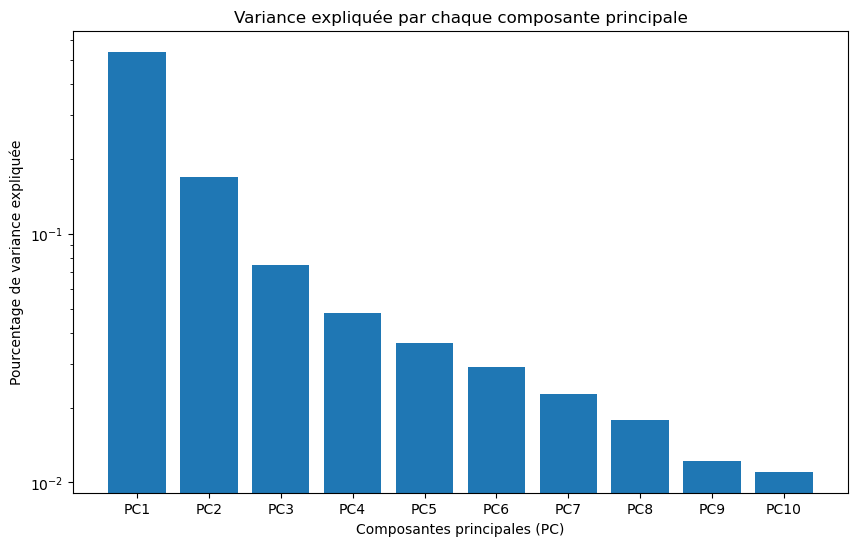

In [73]:
n_components = len(variance_ratio)
labels = [f'PC{i+1}' for i in range(n_components)]


plt.figure(figsize=(10, 6))
plt.bar(labels, variance_ratio)
plt.title('Variance expliquée par chaque composante principale')
plt.xlabel('Composantes principales (PC)')
plt.ylabel('Pourcentage de variance expliquée')
plt.yscale('log')

#### 2.2.2. Projection et visualisation

À présent, on projette les données sur les 2 premières CP pour les visualiser sur un scatter plot. La projection s'effectue :

* par produit matriciel avec les composantes principales, contenues dans l'array `vol_pca.components_`
* via la méthode `transform(...)` du modèle PCA

In [40]:
"""
EXERCICE - Projection et visualisation par PCA.
1. Projettez les données sur les 2 premières CP.
2. Affichez le résultat sur un scatter plot. Que représente chaque point ? Que représentent les axes ? 
3. Étant donné que notre jeu de données est une série temporelle, il serait intéressant de visualiser la trajectoire du vol dans le plan de la PCA.
   Proposez et mettez en œuvre une solution permettant de visualiser cet aspect temporel sur le scatter plot.
   
"""


'\nEXERCICE - Projection et visualisation par PCA.\n1. Projettez les données sur les 2 premières CP.\n2. Affichez le résultat sur un scatter plot. Que représente chaque point ? Que représentent les axes ? \n3. Étant donné que notre jeu de données est une série temporelle, il serait intéressant de visualiser la trajectoire du vol dans le plan de la PCA.\n   Proposez et mettez en œuvre une solution permettant de visualiser cet aspect temporel sur le scatter plot.\n   \n'

Question 1

In [82]:
comp = vol_pca.components_[:2]
projection_components = np.dot(X_vol_norm, comp.T)

projection_transform = vol_pca.transform(X_vol_norm2)[:, :2]


Question 2

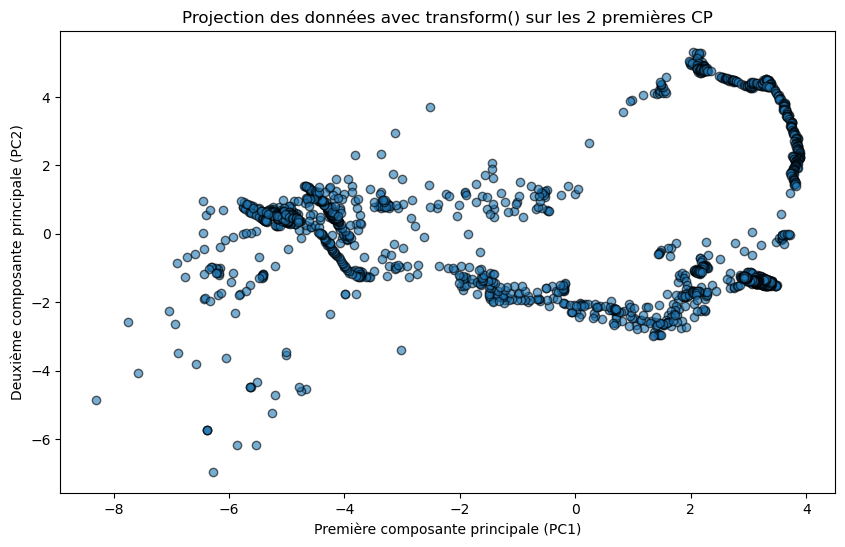

In [83]:
plt.figure(figsize=(10, 6))
plt.scatter(projection_transform[:, 0], projection_transform[:, 1], alpha=0.6, edgecolor='k')
plt.title('Projection des données avec transform() sur les 2 premières CP')
plt.xlabel('Première composante principale (PC1)')
plt.ylabel('Deuxième composante principale (PC2)')
plt.show()

Chaque point représente une observation de la série temporelle projetée dans l'espace des deux premières composantes principales.$\\$
Les axes représentent les directions maximisant la variance dans les données.

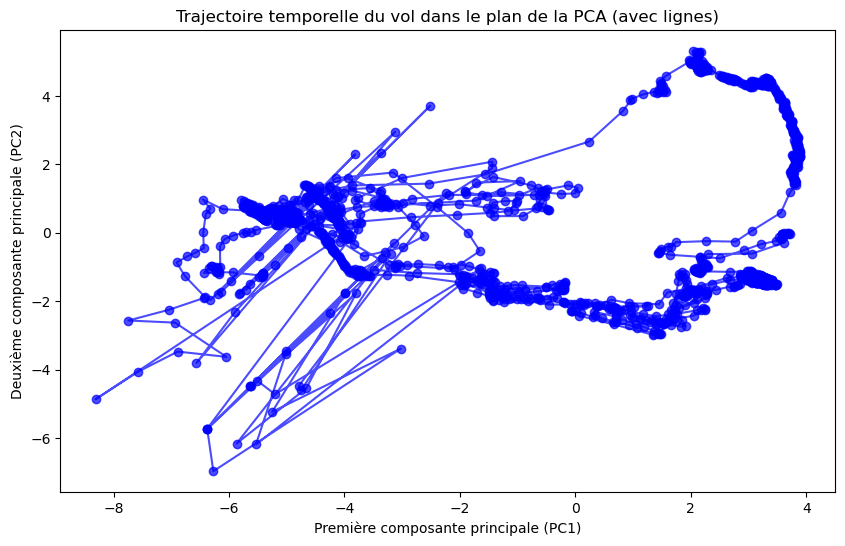

In [88]:
plt.figure(figsize=(10, 6))
plt.plot(projection_transform[:, 0], projection_transform[:, 1], marker='o', linestyle='-', color='b', alpha=0.7)
plt.title('Trajectoire temporelle du vol dans le plan de la PCA (avec lignes)')
plt.xlabel('Première composante principale (PC1)')
plt.ylabel('Deuxième composante principale (PC2)')
plt.show()

Ressource utile : les color maps matplotlib https://matplotlib.org/users/colormaps.html

Text(0.5, 1.0, 'Projection PCA du vol avec phases de vol')

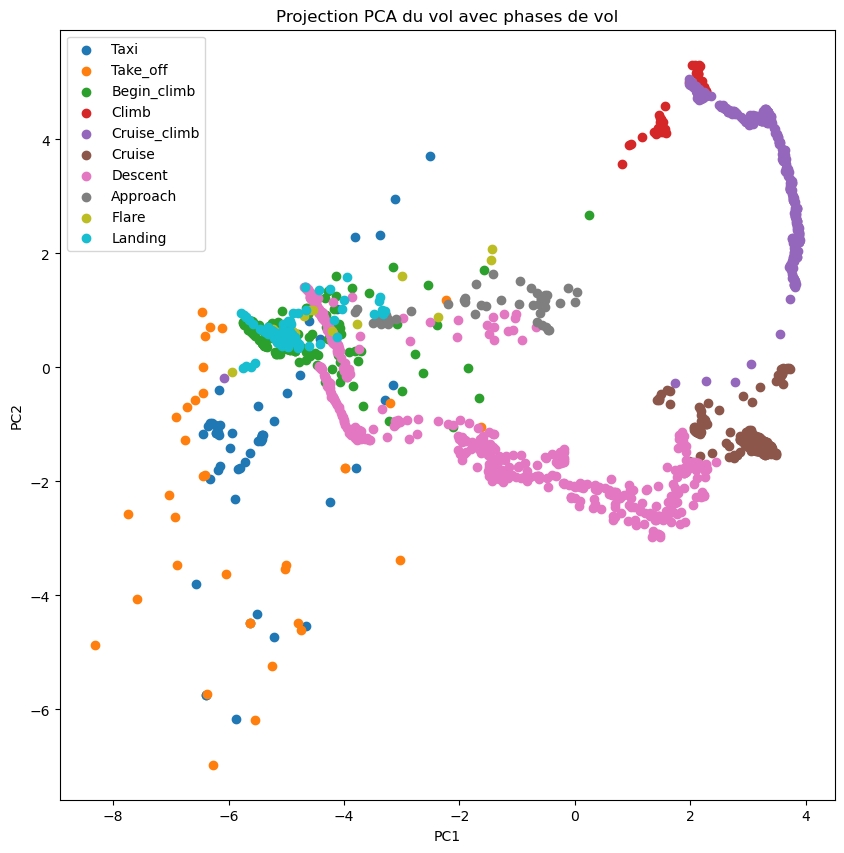

In [90]:
"""
EXERCICE - Projection et visualisation par PCA avec affichage de la phase de vol.
Complétez le code matplotlib suivant afin de de colorer les points par phase de vol, avec une légende.
"""
phases = vol['FLIGHT_PHASE'].unique()
plt.figure(figsize=(10,10))
for phase in phases:
    p = vol['FLIGHT_PHASE'] == phase
    data = projection_transform[p]
    plt.scatter(data[:, 0], data[:, 1], label=phase)
plt.legend()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Projection PCA du vol avec phases de vol')

#### 2.3. $k$-means

L'algorithme $k$-means est disponible dans le module `sklearn.clustering`, au côté d'autres algorithmes de clustering. 

In [91]:
from sklearn.cluster import KMeans

#### 2.3.1. Apprentissage et visualisation des résultats

In [92]:
"""
EXERCICE - k-means clustering
1. Instanciez un modèle k-means avec 10 centroïdes.
2. Apprenez le modèle sur le jeu de données `X_vol_norm` et récupérez les étiquettes des clusters via la méthode de prédiction.
3. Créez une figure composée de 2 graphiques.
   3.1. Sur le graphique 1, affichez le nombre d'éléments par cluster sur un bar plot (indice : la méthode `bincount` de nummy évitera d'écrire une boucle).
   3.2. SUr le graphique 2, affichez un scatter plot de la projection PCA en colorant les points par cluster.
4. Interprétez le résultat. Peut-on établir une correspondance entre les clusters trouvés par k-means et les phases de vol ?
"""


"\nEXERCICE - k-means clustering\n1. Instanciez un modèle k-means avec 10 centroïdes.\n2. Apprenez le modèle sur le jeu de données `X_vol_norm` et récupérez les étiquettes des clusters via la méthode de prédiction.\n3. Créez une figure composée de 2 graphiques.\n   3.1. Sur le graphique 1, affichez le nombre d'éléments par cluster sur un bar plot (indice : la méthode `bincount` de nummy évitera d'écrire une boucle).\n   3.2. SUr le graphique 2, affichez un scatter plot de la projection PCA en colorant les points par cluster.\n4. Interprétez le résultat. Peut-on établir une correspondance entre les clusters trouvés par k-means et les phases de vol ?\n"

Question 1

In [93]:
kmeans = KMeans(n_clusters=10)

Question 2

In [95]:
kmeans.fit(X_vol_norm2)
cluster_etiquettes = kmeans.labels_

Question 3

Text(0, 0.5, 'PC2')

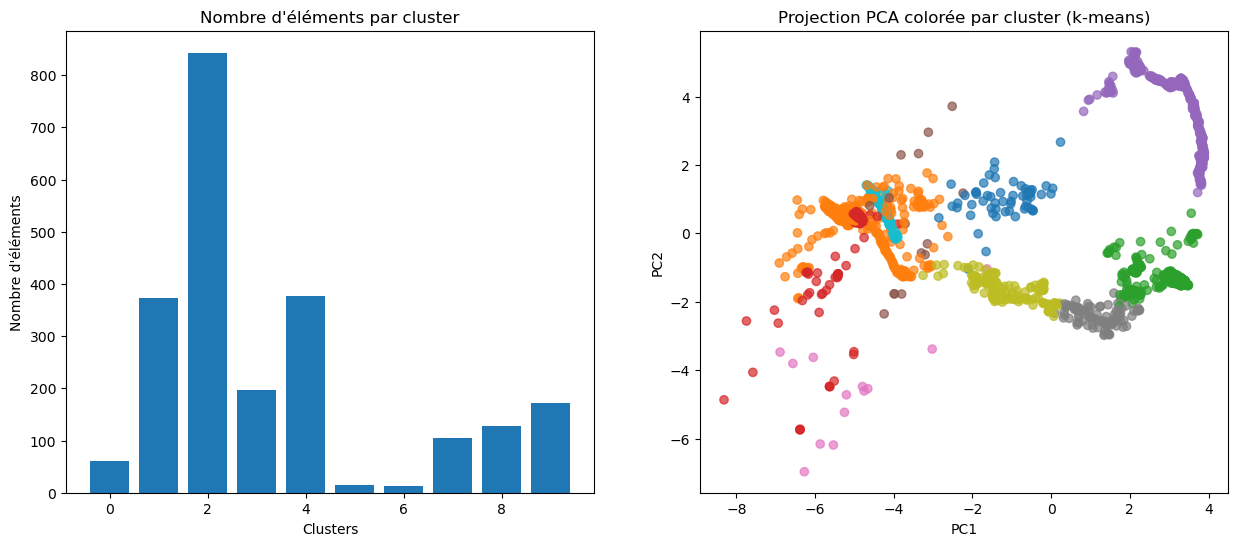

In [101]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))
#Question 3.1
axs[0].bar(np.arange(10), np.bincount(cluster_etiquettes))
axs[0].set_title('Nombre d\'éléments par cluster')
axs[0].set_xlabel('Clusters')
axs[0].set_ylabel('Nombre d\'éléments')
#Question 3.2
scatter = axs[1].scatter(projection_transform[:, 0], projection_transform[:, 1], c=cluster_etiquettes, cmap='tab10', alpha=0.7)
axs[1].set_title('Projection PCA colorée par cluster (k-means)')
axs[1].set_xlabel('PC1')
axs[1].set_ylabel('PC2')


Question 4

Le premier graphique nous permet de montrer la répartition des données dans les 10 clusters. On remarque que le cluster 2 contient plus de 800 points ce qui est nettement plus elevé comparé aux autres notamment les clusters 5 et 6 (environ 20 points).$\\$
Le deuxieme graphique nous permet de visualuser la répartition dans l'espace des deux clusters.$\\$


#### 2.3.2. Calcul de la pureté du clustering

On souhaite maintenant répondre plus en détail à la question :
    
> Peut-on établir une correspondance entre les clusters trouvés par k-means et les phases de vol ?

On commence par évaluer la capacité de notre modèle à trouver des clusters **homogènes par rapport à une variable cible**. Ici, notre variable cible sera la phase de vol. On cherche donc à mesurer si les clusters contiennent des points appartenant à une même phase de vol. Pour cela, on utilise un **indice de qualité de clustering** appelé **pureté** (_purity_). 

La pureté se calcule de la manière suivante :

1. On associe à tous les points d'un cluster la classe (i.e. la variable cible) la plus fréquente au sein de ce cluster.
2. On divise le nombre de points correctement associés à leur cluster par le nombre 
total de points.

Pour un partitionnement $\mathbf{Q} = \{Q_k\}, k = 1 \ldots K$ et en notant $\mathbf{Y} = \{Y_j\}, j = 1 \ldots C$ l'ensemble des points appartenant à chaque classe, on a :
\begin{equation}
    purity(\mathbf{Q}, \mathbf{Y}) = \frac{1}{N} \sum_{k=1}^K \underset{j = 1 \ldots C}{\max} |Q_k \cap Y_j|
\end{equation}

In [127]:
"""
EXERCICE - Calcul de la pureté
1. Implémentez une fonction calculant la pureté d'un clustering à partir des labels et des valeurs de la variable cible. 
2. Quelle la pureté du modèle avec 10 clusters ?
"""

def cluster_purity(labels, targets):
    total_points = len(labels)  
    somme_purete_clusters = 0
    
    for cluster in np.unique(labels):
        cluster_points = targets[labels == cluster]
        
        classes , counts = np.unique(cluster_points, return_counts=True)
        
        class_count = np.max(counts)
        
        somme_purete_clusters += class_count
    
    purity = somme_purete_clusters / total_points
    return purity

pur = cluster_purity(cluster_etiquettes, vol['FLIGHT_PHASE'].values)  
print('Pureté : {:.2f} %'.format(pur * 100))

Pureté : 80.86 %


In [ ]:
"""
EXERCICE - Effet du nombre de clusters sur la pureté
1. Faites varier le nombre de clusters de k-means. Quel est l'effet sur la pureté ?
2. Tracez la pureté en fonction du nombre de clusters pour quelques valeurs de ce nombre (par exemple K=1, 2, 3, 5, 10, 20, 30, 50).
3. Quelle est, à votre avis, la "meilleure" valeur de K ? Que peut-on en conclure ?
"""


Pureté pour k=1 : 34.52%
Pureté pour k=2 : 49.67%
Pureté pour k=3 : 63.73%
Pureté pour k=5 : 71.44%
Pureté pour k=10 : 74.38%
Pureté pour k=20 : 83.49%
Pureté pour k=30 : 87.91%
Pureté pour k=50 : 93.30%


Text(0, 0.5, 'Pureté (%)')

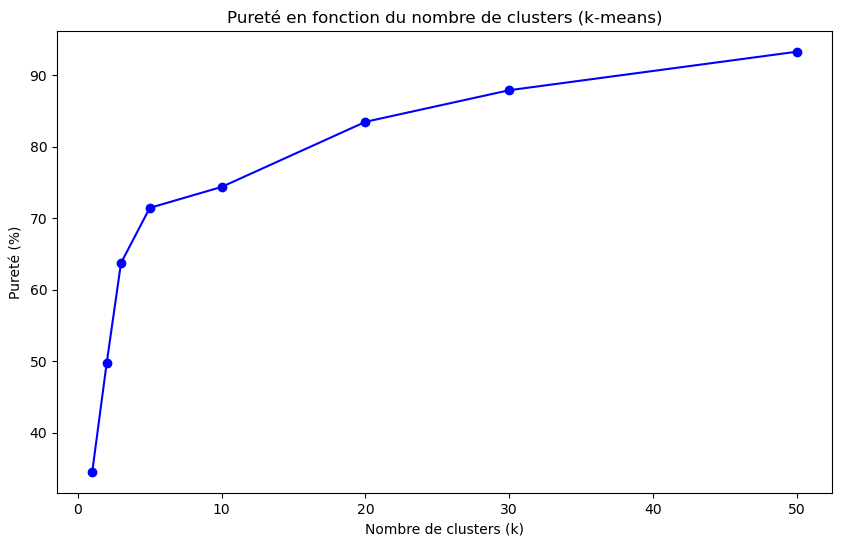

In [130]:
#Question 1
puretes = []

k_values = [1, 2, 3, 5, 10, 20, 30, 50] #à modifier
for k in k_values:
    kmeans2 = KMeans(n_clusters=k)
    kmeans2.fit(X_vol_norm2)
    cluster_etiquettes2 = kmeans2.labels_
    purete = cluster_purity(cluster_etiquettes2, vol['FLIGHT_PHASE'].values)
    puretes.append(purete*100)
    print(f"Pureté pour k={k} : {purete*100:.2f}%")

#Question 2   
plt.figure(figsize=(10, 6))
plt.plot(k_values, puretes, marker='o', linestyle='-', color='b')
plt.title('Pureté en fonction du nombre de clusters (k-means)')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Pureté (%)')

 

Question 3 $\\$
À mon avis, un bon choix de k serait 5 ou 10 car la pureté est raisonnable et le nombre de cluster n'est pas trop elevé.

#### 2.3.3. Calcul de la précision de classification non supervisée (_unsupervised clustering accuracy_)

Enfin, on souhaite évaluer la performance de notre modèle en tant que classificateur.

**Note** : cette approche n'a de sens que si le nombre de clusters est égal au nombre de classes de la variable cible !

Pour ce faire, nous allons passer par une métrique appelée **unsupervised clustering accuracy**. Celle-ci correspond à la précision de classification (i.e. proportion de points correctement classifiés), mais dans un cadre non supervisé. Cette métrique mesure la capacité à partitionner les données selon les différentes modalités d'une variable cible. La question est donc de mesurer la capacité du modèle $k$-means à partitionner les données selon la phase de vol.

Cette métrique s'écrit :
\begin{equation}
    acc(\mathbf{Q}, \mathbf{Y}) = \frac{1}{N} \underset{m}\max \sum_{k=1}^K |Q_k \cap Y_{m(k)}|
\end{equation}

où on cherche la meilleure association $m$ (_mapping_) deux à deux entre clusters et classes (dans notre cas, l'association entre Cluster 0, Cluster 1, etc. et les phases de vol taxi, take_off, etc.).

Pour calculer cette meilleur association, un algorithme efficace est la _méthode Hongroise_ ou algorithme de Kuhn-Munkres. Celui-ci est disponible dans le module de scipy `scipy.optimize.linear_sum_assignment`.

In [131]:
from scipy.optimize import linear_sum_assignment

In [132]:
def cluster_acc(labels, targets):
    assert labels.size == targets.size
    D = max(labels.max(), targets.max()) + 1
    w = np.zeros((D, D))
    for i in range(labels.size):
        w[labels[i], targets[i]] += 1
    row_ind, col_ind = linear_sum_assignment(w.max() - w)
    return w[row_ind, col_ind].sum() * 1.0 / labels.size

acc = cluster_acc(labels, vol['FLIGHT_MOD'])
print('Accuracy : {:f} %'.format(acc*100))

AttributeError: 'list' object has no attribute 'size'

#### Test Khi-2

Découvrir la library scipy pour effectuer le test de chi-deux d'indépendance des variables dans un tableau de contingence.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html

scipy.stats.chi2_contingency : fonction permet de calculer le score de khi-2 et la p-value pour le test d'hypothèse d'indépendance des fréquences observées. 